## **3. Sampling in Python**

**Sampling in Python** is the cornerstone of inference statistics and hypothesis testing. It's a powerful skill used in survey analysis and experimental design to draw conclusions without surveying an entire population.

### **3.1. Introduction to Sampling**

The **population** is the complete dataset and the **sample** is the subset of data you calculate on.


### **3.2. Sampling Methods**

Here we will exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.



#### **Sampling and Point Estimates**

In [221]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import random

In [222]:
spotify_population = pd.read_feather('../datasets/spotify_2000_2020.feather')
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [223]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140899896
3.8826932999999992


#### **Convenience Samling**

Convenience Samling aren't representative for the population!

#### **Pseudo-random number generation**

- Pseudo-random generation is cheap and fast
- Next "random" number calculated from previous "random" number
- The first "random" number calculated from a seed 
- The same seed value yields the same random numbers 

**The process is deterministic, the trick to a random number generator is to make it look like the values are random**

In [224]:
randoms = np.random.beta(a=2,b=2, size = 5000)
randoms

array([0.3603214 , 0.66607742, 0.47342939, ..., 0.64350337, 0.57465183,
       0.42218908])

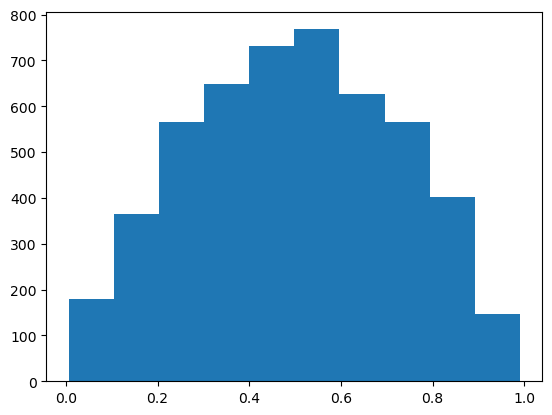

In [225]:
plt.hist(randoms)
plt.show()

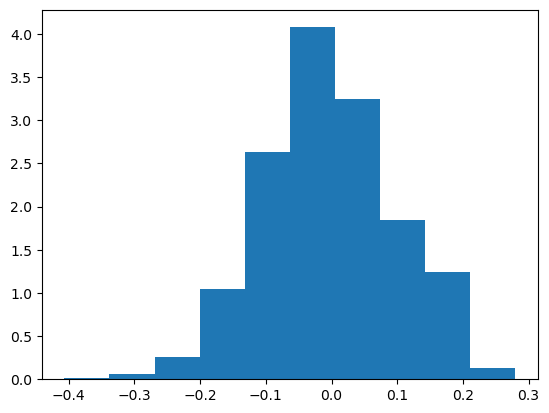

In [226]:
mu, sigma = 0, 0.1 
normal = np.random.normal(mu, sigma, 1000)
plt.hist(normal, density=True)
plt.show()


### **3.2. Sampling Methods**

The simplest method is known as **simple random sampling (sometimes abbreviated to "SRS")**, and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

Now we will apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

In [227]:
attrition_pop = pd.read_feather('../datasets/attrition.feather')
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [228]:
attrition_pop.shape

(1470, 31)

In [229]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

attrition_samp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,0.0,Travel_Frequently,1410,Sales,3,Below_College,Medical,Very_High,Female,...,Outstanding,Medium,2,6,3,Better,6,5,0,4
1180,36,0.0,Travel_Rarely,530,Sales,2,Master,Life_Sciences,High,Female,...,Excellent,High,0,17,2,Good,13,7,6,7
230,26,0.0,Travel_Rarely,1443,Sales,23,Bachelor,Marketing,High,Female,...,Excellent,High,1,5,2,Good,2,2,0,0
211,29,0.0,Travel_Frequently,410,Research_Development,2,Below_College,Life_Sciences,Very_High,Female,...,Excellent,High,3,4,3,Better,3,2,0,2


#### **Systematic sampling**

One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.



In [230]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]
attrition_sys_samp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,48,0.0,Travel_Rarely,715,Research_Development,1,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,High,0,25,3,Best,1,0,0,0
1386,48,0.0,Travel_Rarely,1355,Research_Development,4,Master,Life_Sciences,High,Male,...,Excellent,Medium,0,27,3,Better,15,11,4,8
1407,50,0.0,Travel_Rarely,989,Research_Development,7,College,Medical,Medium,Female,...,Excellent,Very_High,1,29,2,Good,27,3,13,8
1428,50,0.0,Non-Travel,881,Research_Development,2,Master,Life_Sciences,Low,Male,...,Excellent,Very_High,1,31,3,Better,31,6,14,7


**Systematic sampling has a problem**: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. **The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.**

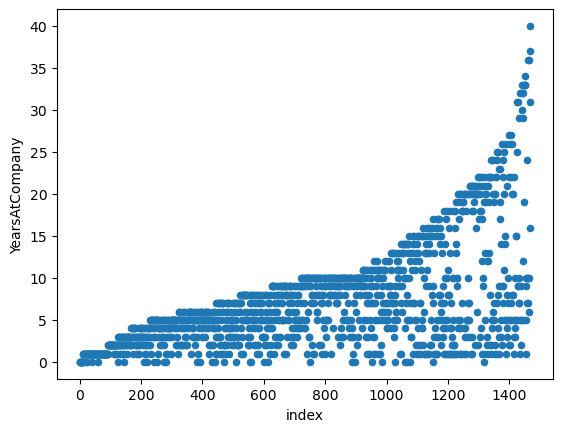

In [231]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

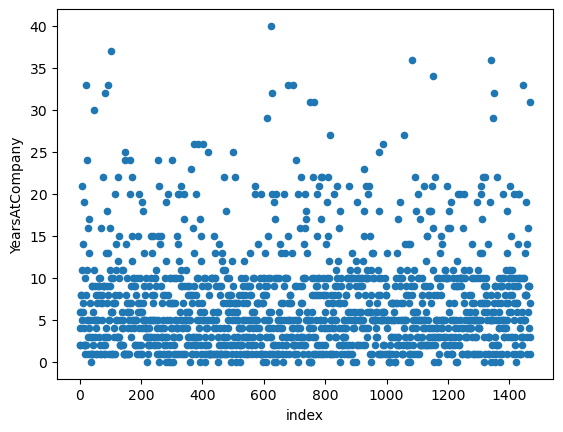

In [232]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

#### **Stratified sampling**

If you are **interested in subgroups within the population**, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.


- **Split the population into subgroups**
- **Use simple random sampling on every subgroup**


In [233]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64


In [234]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education')\
	.sample(frac=0.4, random_state=2022)

attrition_strat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,38,0.0,Travel_Frequently,653,Research_Development,29,Doctor,Life_Sciences,Very_High,Female,...,Excellent,Very_High,0,10,2,Better,10,3,9,9
1061,44,0.0,Travel_Frequently,602,Human_Resources,1,Doctor,Human_Resources,Low,Male,...,Excellent,High,0,14,3,Better,10,7,0,2
1307,41,0.0,Travel_Rarely,1276,Sales,2,Doctor,Life_Sciences,Medium,Female,...,Excellent,Medium,1,22,2,Better,18,16,11,8
1060,33,0.0,Travel_Rarely,516,Research_Development,8,Doctor,Life_Sciences,Very_High,Male,...,Excellent,Low,0,14,6,Better,0,0,0,0


In [235]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64


**If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis**, then you can **use equal counts stratified sampling** to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

In [236]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
	.sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True) 

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


#### **Weighted sampling**

Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

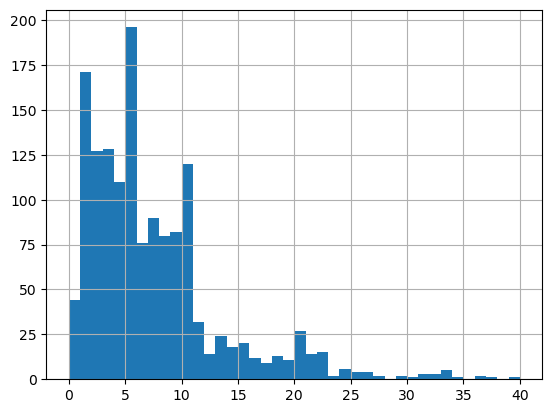

In [237]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

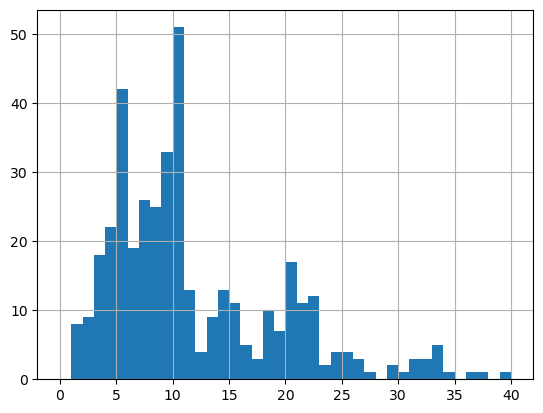

In [238]:
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

#### **Cluster Sampling**

- We limit the number of subgroups in the analysis by picking a few of them with simple random sampling.
- We then perform simple random sampling on each subgroup as before.

In [239]:
coffee_ratings = pd.read_feather('../datasets/coffee_ratings_full.feather')
coffee_ratings.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [240]:
varieties_pop = list(coffee_ratings['variety'].unique())
varieties_pop

[None,
 'Other',
 'Bourbon',
 'Catimor',
 'Ethiopian Yirgacheffe',
 'Caturra',
 'SL14',
 'Sumatra',
 'SL34',
 'Hawaiian Kona',
 'Yellow Bourbon',
 'SL28',
 'Gesha',
 'Catuai',
 'Pacamara',
 'Typica',
 'Sumatra Lintong',
 'Mundo Novo',
 'Java',
 'Peaberry',
 'Pacas',
 'Mandheling',
 'Ruiru 11',
 'Arusha',
 'Ethiopian Heirlooms',
 'Moka Peaberry',
 'Sulawesi',
 'Blue Mountain',
 'Marigojipe',
 'Pache Comun']

##### **Stage 1: Sampling for subgroups**

In [241]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())
job_roles_pop

['Research_Scientist',
 'Sales_Representative',
 'Laboratory_Technician',
 'Human_Resources',
 'Sales_Executive',
 'Manufacturing_Director',
 'Healthcare_Representative',
 'Research_Director',
 'Manager']

In [242]:
job_roles_samp = random.sample(job_roles_pop, k=4)
job_roles_samp

['Manufacturing_Director',
 'Sales_Executive',
 'Research_Scientist',
 'Healthcare_Representative']

##### **Stage 2: Sampling each group**

In [244]:
# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole").sample(n=10, random_state=1)
attrition_clust.shape

/var/folders/xd/bl24pspn4ns029hxnm0k8hyc0000gn/T/ipykernel_4849/1050173073.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


(40, 31)

### **3.3. Sampling Distributions**

### **3.4. Bootstrap Distributions**